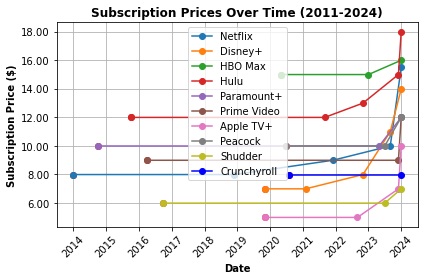

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
df = pd.read_csv('streaming_service.csv')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Drop duplicates, keeping only the first and last occurrence for each unique price
df_first_occurrence = df.drop_duplicates(subset=['service'], keep='first')
df_last_occurrence = df.drop_duplicates(subset=['service', 'price'], keep='last')
df_unique_prices = pd.concat([df_first_occurrence, df_last_occurrence])

# Get unique entertainment platforms
services = df['service'].unique()

# Plotting each platform on separate lines
for service in services:
    service_df = df_unique_prices[df_unique_prices['service'] == service]
    service_df = service_df.sort_values(by='date')  # Sort by date

    # Plotting the first point for the current platform
    first_point = service_df.head(1)
    plt.scatter(first_point['date'], first_point['price'], color='red', marker='o')

    # Plotting the line for the current platform
    if service == 'Crunchyroll':
        # Plotting lines connecting the first and last points for Crunchyroll
        plt.plot(service_df['date'], service_df['price'], marker='o', linestyle='-', color='blue', label=service)
    else:
        plt.plot(service_df['date'], service_df['price'], marker='o', linestyle='-', label=service)

# Adding labels and title
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Subscription Price ($)', fontweight='bold')
plt.title('Subscription Prices Over Time (2011-2024)', fontweight='bold')

# Adding gridlines
plt.grid(True)

# Adding legend
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Displaying the plot
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()